# Some basic discrete-time signals
Discrete-time signals are sequences, or functions with integer-valued arguments
$$ f:\, \mathbb{Z} \rightarrow \mathbb{R} $$
$$ f(k) \in \mathbb{k}, \; k \in \mathbb{Z} = \{\ldots, -2,-1,0,1,2,\ldots\}$$
Below are some important examples

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## The impulse function
$$ f(k) = \delta (k) = \begin{cases} 1 & k=0\\ 0 & \text{otherwise} \end{cases}$$

Text(0,0.5,'$\\delta(k)$')

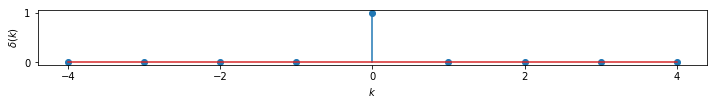

In [16]:
k = np.arange(-4,5)
plt.figure(figsize=(12,1))
plt.stem(k, k==0)
plt.xticks([-4,-2,0,2,4])
plt.xlabel('$k$')
plt.ylabel('$\delta(k)$')

## The unit step function
$$ f(k) = u_s (k) = \begin{cases} 1 & k\ge 0\\ 0 & k < 0 \end{cases}$$

Text(0,0.5,'$u_s(k)$')

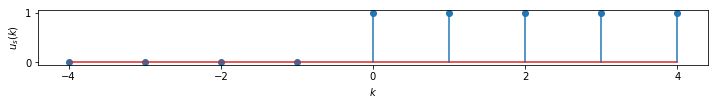

In [35]:
k = np.arange(-4,5)
plt.figure(figsize=(12,1)); 
plt.stem(k, k>=0)
plt.xticks([-4,-2,0,2,4])
plt.xlabel('$k$')
plt.ylabel('$u_s(k)$')

## Connection between the impulse and the step function
The impulse funktion is obtained by taking the first difference of the step function
$$ \delta(k) = (1-\text{q}^{-1})u_s(k) = u_s(k)-u_s(k-1). $$
Note the *shift operator* q, whose definition is that it shifts the sequence forward (advaneces it). Consequently the inverse shift operator $\text{q}^{-1}$ shifts the sequence backwards (delays it) one step.

[Text(0,0.5,'$\\delta(k)$')]

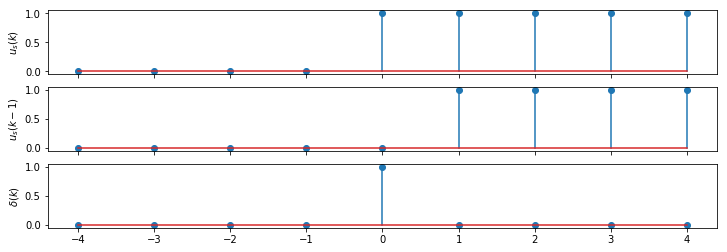

In [42]:
k = np.arange(-4,5)
us = k>=0
us_shift1 = k>=1 # The shifted sequence is one when k-1 >=0 <=> k>= 1
fig,axs = plt.subplots(3,1, sharex=True, figsize=(12,4))
axs[0].stem(k, us); axs[0].set(ylabel  = '$u_s(k)$')
axs[1].stem(k, us_shift1); axs[1].set(ylabel  = '$u_s(k-1)$')
axs[2].stem(k, k==0) ; axs[2].set(ylabel  = '$\delta(k)$')

Clearly the bottom sequence is obtained by subtracting the second sequence from the first.

The unit step function can be obtained by summing over the impulse funktion
$$ u_s(k) = \sum_{i=-\infty}^k \delta(i). $$

Text(-4,0.5,'$k=2,\\;$ summing zeros and a single one')

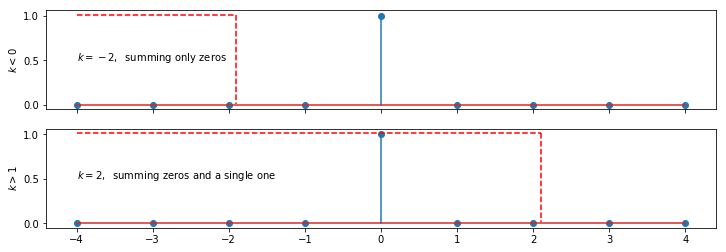

In [54]:
k = np.arange(-4,5)
dlta = k==0
fig,axs = plt.subplots(2,1, sharex=True, figsize=(12,4))
axs[0].stem(k, dlta); axs[0].set(ylabel  = '$k < 0$')
axs[1].stem(k, dlta); axs[1].set(ylabel  = '$k > 1$')
axs[0].plot([-4,-1.9], [1.01, 1.01], 'r--')
axs[0].plot([-1.9,-1.9], [1.01, .01], 'r--')
axs[0].text(-4,0.5, '$k=-2,\;$ summing only zeros')
axs[1].plot([-4, 2.1], [1.01, 1.01], 'r--')
axs[1].plot([2.1, 2.1], [1.01, .01], 'r--')
axs[1].text(-4,0.5, '$k=2,\;$ summing zeros and a single one')

## Real exponential
The real exponential is
$$ f(k) = a^k. $$
Let's look at three cases 
### Exampel 1 $a=0.5$

Text(0,0.5,'$0.5^k$')

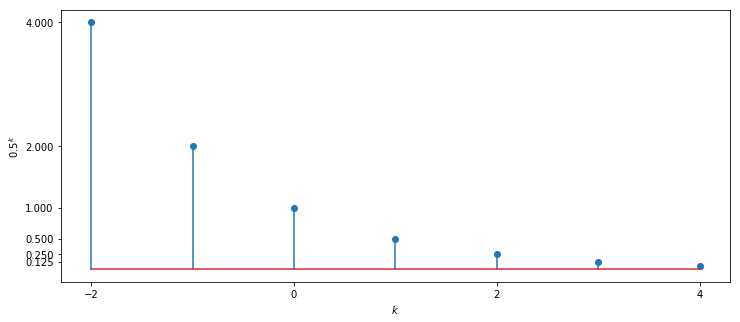

In [64]:
a = 0.5
k = np.arange(-2,5)
plt.figure(figsize=(12,5))
plt.stem(k, np.power(a, k))
plt.xticks([-2,0,2,4]); plt.yticks(np.power(a,k[:-1]))
plt.xlabel('$k$')
plt.ylabel('$0.5^k$')

### Exampel 2 $a = 2$

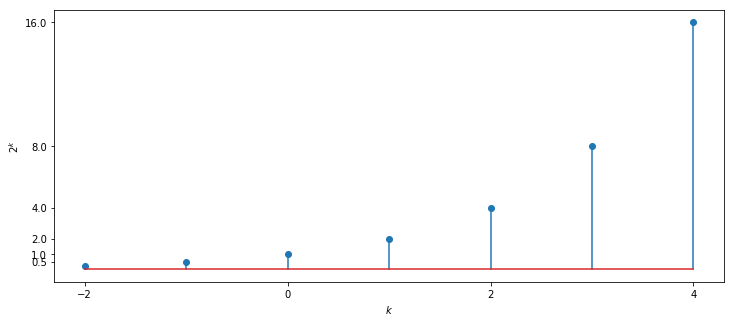

In [70]:
a = 2.0
k = np.arange(-2,5)
plt.figure(figsize=(12,5))
plt.stem(k, np.power(a, k))
plt.xticks([-2,0,2,4]); plt.yticks(np.power(a,k[1:]))
plt.xlabel('$k$')
plt.ylabel('$2^k$');

### Exampel 3 $a = -0.8$

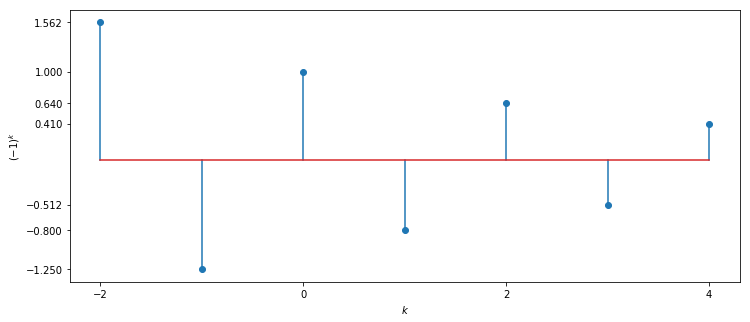

In [69]:
a = -.8
k = np.arange(-2,5)
plt.figure(figsize=(12,5))
plt.stem(k, np.power(a, k))
plt.xticks([-2,0,2,4]); plt.yticks(np.power(a,k[:]))
plt.xlabel('$k$')
plt.ylabel('$(-1)^k$');

## Sinusoid
$$ f(k) = a\sin(\omega_0 k + \phi), \quad k \in \mathbb{Z},\quad a,\omega_0, \phi \in \mathbb{R} $$

The discrete-time sinusoid has two important differences compared to the continuous-time sinusoid:

### It has infinitely many *aliases* at frequencies that are multiples of $2\pi$
$$\sin\big((\omega_0 + n2\pi)k + \phi\big) = \sin(\omega_0k + \phi), \quad n\in\mathbb{Z}$$ 
This means that the signal with frequency $\omega_0$ and the signal with frequency $\omega_0 + n2\pi$, where $n$ is an integer, are identical. 

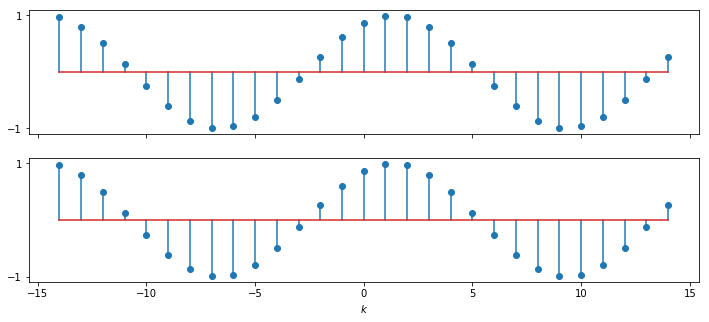

In [84]:
a = 1.0; w0 = np.pi/8; phi = np.pi/3; n=3
k = np.arange(-14,15)
fig,axs = plt.subplots(2, 1, sharex=True,figsize=(12,5))
axs[0].stem(k, np.sin(w0*k+phi))
axs[1].stem(k, np.sin((w0+2*np.pi*n)*k+phi))
axs[0].set(yticks=[-1,1])
axs[1].set(yticks=[-1,1])
plt.xlabel('$k$');

In the example above, wee see that we cannot know by just looking at a discrete-time sinusoid, which of the alias frequencies it has ($\omega_0=\pi/8$ and $\omega_0+n2\pi=\pi/8 + 6\pi$ in the example). Since the discrete-time sinusoid is often obtained by sampling a continuous-time sinusoid, we reach the very important conclusion that **continous-time sinusoids of frequency $\omega_0$ and $\omega_0 + n\omega_s$ have the same sample values**, and so are not distinguishable when sampled. Here $\omega_s$ is the sampling frequency in radians per second.

### It is not always periodic
This is due to the fact that the argument $\omega_0k + \phi$ to the sinusoid is only taking on discrete values, and not all real values as in the continuous-time case.
The discrete-time sinusoid is periodic when $f(k+N) = f(k)$ for some integer $N$. This requires that 
$$\omega_0(k+N) = \omega_0k + 2\pi M, $$
$$ \omega_0k +  \omega_0N = \omega_0k + 2\pi M $$
for some integers $N$ and $M$. This gives 
$$\omega_0N = 2\pi M \quad \Leftrightarrow \quad \frac{\omega_0}{2\pi} = \frac{M}{N},$$
which means that the ratio of $\omega_0$ to $2\pi$ must be a rational number.

The above analysis show that we can have discrete-time sinusoids that are periodic where the period length is longer than one wavelength. To obtain a discrete-time sinusoid in which the period equals one wavelength we must require that
$$ \omega_0k + \omega_0N = \omega_0k + 2\pi \quad \Rightarrow \quad \omega_0 = \frac{2\pi}{N}. $$

#### Periodic example with periodiciy equal to one wavelength $\omega_0 = \pi/8$, $\phi=\pi/3$

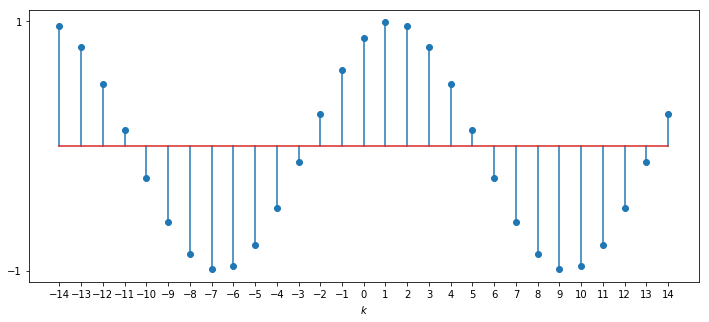

In [75]:
w0 = np.pi/8; phi = np.pi/3
k = np.arange(-14,15)
plt.figure(figsize=(12,5))
plt.stem(k, np.sin(w0*k+phi))
plt.xticks(k); plt.yticks([-1,1])
plt.xlabel('$k$')
plt.ylabel('');

#### Periodic example with periodiciy equal to two wavelengths $\omega_0 = 4\pi/17$, $\phi=\pi/3$

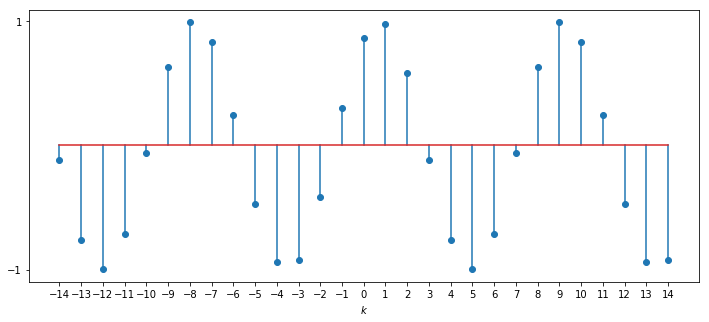

In [89]:
w0 = 4*np.pi/17; phi = np.pi/3
k = np.arange(-14,15)
plt.figure(figsize=(12,5))
plt.stem(k, np.sin(w0*k+phi))
plt.xticks(k); plt.yticks([-1,1])
plt.xlabel('$k$')
plt.ylabel('');

#### Aperiodic example $\omega_0 = 1$, $\phi = \pi/3$

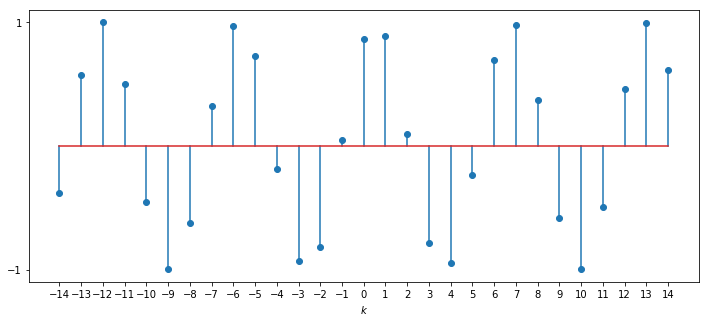

In [76]:
w0 = 1
phi = np.pi/3
k = np.arange(-14,15)
plt.figure(figsize=(12,5))
plt.stem(k, np.sin(w0*k+phi))
plt.xticks(k); plt.yticks([-1,1])
plt.xlabel('$k$')
plt.ylabel('');

#### Exercise: Construct an example with periodicity of three wavelengths

In [ ]:
#Your code here